# Сборный проект Игры (магазин "Стримчик")

## Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Цель
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



## Описание данных
- `'Name'` - название игры.
- `'Platform'` - платформа.
- `'Year_of_Release'` - год выпуска.
- `'Genre'` - жанр игры.
- `'NA_sales'` - продажи в Северной Америке (миллионы проданных копий).
- `'EU_sales'` - продажи в Европе (миллионы проданных копий).
- `'JP_sales'` - продажи в Японии (миллионы проданных копий).
- `'Other_sales'` - продажи в других странах (миллионы проданных копий).
- `'Critic_Score'` - оценка критиков (максимум 100).
- `'User_Score'` - оценка пользователей (максимум 10).
- `'Rating'` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы
* Изучение данных.
* Анализ качества полученных данных.
* Предобработка данных.
    * Приводим данные к правильному виду.
    * Работаем с пропусками.
    * Меняем тип данных.
    * Создаем вспомогательные столбцы.
* Исследовательский анализ данных.
    * Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.
    * Посмотрим, как менялись продажи по платформам.
    * Рассматриваем детально промежуток времени с 2013 года.
    * Построим для перспективных платформ график «ящик с усами».
    * На примере платформы PS4, посмотрим, как влияют отзывы пользователей и критиков на продажи.
    * Проверим так ли это для других 3-ех платформ.
    * Рассмотрим зависимость объема продаж от жанра.
    * Составим портрет пользователя каждого региона.
    * Проверим гипотезы.
        * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Общий вывод.

## Изучение данных.

In [1]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sea
from scipy import stats as st
import os

In [2]:
# Создаем DataFrame и делаем его копию
pth1 = '/datasets/games.csv'
pth2 = 'e:\WORK\Образование\Аналитик данных\Dataset\Dataset\games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Не найден DataSet')   

# try:
#     data = pd.read_csv('/datasets/games.csv')
# except:
#     data = pd.read_csv('e:\WORK\Образование\Аналитик данных\Dataset\Dataset\games.csv')

warnings.filterwarnings("ignore")    
data_copy = data.copy(deep=True)
columns = ['name', 'discription']
string = [
    ['Name', 'название игры'],
    ['Platform', 'платформа'], 
    ['Year_of_Release', 'год выпуска'], 
    ['Genre', 'жанр игры'],
    ['NA_sales', 'продажи в Северной Америке (миллионы проданных копий)'],
    ['EU_sales', 'продажи в Европе (миллионы проданных копий)'],
    ['JP_sales', 'продажи в Японии (миллионы проданных копий)'],
    ['Other_sales', 'продажи в других странах (миллионы проданных копий)'],
    ['Critic_Score', 'оценка критиков (максимум 100)'],
    ['User_Score', 'оценка пользователей (максимум 10)'],
    ['Rating', 'рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию']
]
data_columns = pd.DataFrame(columns=columns, data=string)

Функции

In [3]:
def show_nan(data):

    ((pd.DataFrame(data.isna().mean()*100))
      .sort_values(by = 0, ascending = True)
      .plot(kind= 'barh', figsize=(10,4), legend = False, color='orange')
      .set_title('% NaNs')    
    );
    return

In [4]:
def corr_by_percent(data, name1, name2, percent=10):
    warnings.filterwarnings("ignore")
    data = data.dropna(subset=[name1, name2])  
    table = pd.DataFrame(columns=['percent','percent_corr'])
    for i in range(int(100/percent)):
        if i > 0:
            data.loc[(data[name1] <= data[name1].max()*((i+1)*percent)/100) & \
                     (data[name1] >= data[name1].max()*((i)*percent)/100), 'percent'] = (i+1)*percent
        data.loc[(data[name1] == 0), 'percent'] = i*percent
            
        data.loc[data['percent'] == i, 'percent_corr'] =\
        (data[data['percent'] == i][name1]).corr(data[data['percent'] == i][name2])   
        
        table.loc[i,'percent'] = i+1
        table.loc[i,'percent_corr'] = (data[data['percent'] == i][name1]).corr(data[data['percent'] == i][name2])
        
    return table

In [5]:
def data_analis_diigits(data=data, data_columns=data_columns, lenght=100, text=False):
    """
    Функция для первичного анализа DataFrame и формирования описательной части в Jupyter
    Передаваемые параметры: data - наш DataFrame, lenght - максимальное кол-во уникальных значений в столбце, text - надо ли формировать описательную часть
    
    """
    print('=====================================================================================================================')
    print('Анализ DataFrame')
    print('=====================================================================================================================')
    print('Этап 1. Первичный анализ.')
    print('=====================================================================================================================')
    display(data.info())
    display(data.sample(5, random_state =27))
    df = data.describe(include='all')
    for i in df.columns:
        df = df.rename(columns= {i: f'>{i}< U:{len(data[i].unique())} NaN:{data[i].isna().sum()} NaN%:{data[i].isna().mean():.2%} T:{data[i].dtypes}'})
    df = df.reset_index()
    if len(df.columns) > 7:
        for i in range(int((len(df.columns)) / 7)):
            df.insert(7*(i+1), 'index'+str(i+1), df['index'])
    display(df)
    plt.show()
    print('==================')
    print('Названия стобцов.')
    print('==================')
    print(data.columns)
    print('==================')
    print('Явные пропуски.')
    print('==================')
    print(data.isna().mean())
    print('==================')
    print('Явные дубликаты.')
    print('==================')
    print(data.duplicated().sum())
    print('==================')
    for i in data.columns:
        if len(data[i].unique()) <= lenght:
            print('======================================================')
            print('Уникальные значения и их кол-во в столбце:', i)
            print('======================================================')
            print(data.sort_values(by=i).groupby(i)[i].count())
    print('======================================================')
    print('Основные параметры числовых значений')
    print('======================================================')
    display(data.describe())
    if text:
        print('\n\n\n')
        print('Таблица для оформления анализа даннных DF.')
        print('## Анализ качества полученных данных.')
        print('В DataFrame:\n<br>- столбцов: ', len(data.columns), '\n<br>- строк: ', len(data), '\n<br>- явных дубликатов: ', data.duplicated().sum(), '\n<br>- доля пропусков в столбцах:\n<br>', sep='',end='')
        for i in data.columns:
            if data[i].isna().mean() > 0:
                print(f'{i}: {data[i].isna().mean():.2%} или {data[i].isna().sum()} шт.<br>')
                
        print('\n\n<b>Проанализируем качество данных в столбцах:<b>')
        for i in range(len(data_columns)):
            x="'"
            print('- `', x, data_columns['name'][i], x, '`','<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: ', data[data_columns['name'][i]].dtypes, '.<br> Значение: ', data_columns['discription'][i], '.<br>Проблемы: 1) Название в верхнем регистре. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками.', sep='')            
        
        print('\n\n Для вводной части')
        for i in range(len(data_columns)):
            x="'"
            print('- `', x, data_columns['name'][i], x, '`',' - ', data_columns['discription'][i],'.', sep='')            

In [6]:
def data_analis_visual(data=data, lenght=100):
    print('======================================================')
    print('Процент пропуска в данных')
    print('======================================================')
    ((pd.DataFrame(data.isna().mean()*100))
      .sort_values(by = 0, ascending = True)
      .plot(kind= 'barh', figsize=(10,4), legend = False, color='orange')
      .set_title('% NaNs')    
    );
    plt.show()
    print('======================================================')
    print('Визуальный анализ категорииалльных переменных')
    print('======================================================')
    temp = []
    for i in data.select_dtypes(exclude=['float64', 'int64']).columns: 
        if len(data[i].unique()) > 30:
            temp.append(i)
    print('Слишком большое кол-во кникальных значений у категориальных переменных в столбцах: ', temp,'\n\n')
    for i in data.select_dtypes(exclude=['float64', 'int64']).columns: 
        if len(data[i].unique()) < 30:
            data[i].value_counts().plot(kind='barh', legend=True);
            plt.show()    
    print('======================================================')
    print('Визуальный анализ количественных переменных')
    print('======================================================')
    for i in data.select_dtypes(include=['float64', 'int64']).columns:
        data[i].hist(range=(0,data[i].std()*8), bins=len(data[i].unique())+ 30, figsize=(6,4), legend=True);
        plt.show()
   
    return

In [7]:
def mustache(data, side):
    if side == 'left':
        size_of_mustache = data.quantile(.25) - (data.quantile(.75) - data.quantile(.25))*1.5
        if size_of_mustache <0:
            size_of_mustache = 0
    elif side == 'right':
        size_of_mustache = data.quantile(.75) + (data.quantile(.75) - data.quantile(.25))*1.5
    elif side == 'lenght':
        size_of_mustache = (data.quantile(.75) - data.quantile(.25))*1.5
    return float(size_of_mustache)
    

In [8]:
def mustache_analis(data, name, b=100, xname='', yname='', title=''):
    """
    Функция для вывода данных столбца (гистограммы, таблицы, границы) для анализа аномалий, 
    типа распределения, массива данных в целом.
    
    """ 
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    data[name].hist(bins=b);
    plt.show()
    print('Левая граница усов:', mustache(data[name], side='left'))
    print('Правая граница усов:', mustache(data[name], side='right'))
    try:
        plt.title('Коробка с усами')
        plt.xlabel(xname)
        plt.ylabel(yname)
        data[name].hist(range=(mustache(data[name], side='left'), mustache(data[name], side='right')), bins=b);
        plt.show()
    except:
        print('Ошибка')
    if mustache(data[name], side='left') > 0:
        plt.title('За левым усом')
        plt.xlabel(xname)
        plt.ylabel(yname)
        data[name].hist(range=(0, mustache(data[name], side='left')), bins=b);
        plt.show()
    if mustache(data[name], side='right') < data[name].max():
        plt.title('За правм усом')
        plt.xlabel(xname)
        plt.ylabel(yname)
        data[name].hist(range=(mustache(data[name], side='right'), data[name].max()), bins=b);
        plt.show()
    print('Первые 10 минимальных параметров', name)
    display(data.sort_values(by=name).head(10))
    print('Первые 10 максимальных параметров', name)
    display(data.sort_values(by=name, ascending=False).head(10))
    
    try:
        print('Сводная таблица по области за левым усом', name)
        display(data[(data[name] < mustache(data[name], side='left'))].describe(include='all'))
    except:
        print('Ошибка')
    try:
        print('Сводная таблица по области за правм усом', name)
        display(data[(data[name] > mustache(data[name], side='right'))].describe(include='all'))
    except:
        print('Ошибка')
        
    print('Доля объявлений с анамально низкими параметрами: {:.2%}'.format(data[(data[name] < mustache(data[name], side='left'))][name].count()/len(data)))
    print('Доля объявлений с анамально высокими параметрами {:.2%}'.format(data[(data[name] > mustache(data[name], side='right'))][name].count()/len(data)))
    return

In [9]:
def levenstein(str_1, str_2):
    n, m = len(str_1), len(str_2)
    if n > m:
        str_1, str_2 = str_2, str_1
        n, m = m, n

    current_row = range(n + 1)
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if str_1[j - 1] != str_2[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

In [10]:
data_analis_diigits(data, text=True)

Анализ DataFrame
Этап 1. Первичный анализ.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11664,NHL Hitz 20-03,GC,2002.0,Sports,0.06,0.02,0.00,0.00,82.0,8.4,E
10385,Viewtiful Joe: Double Trouble!,DS,2005.0,Action,0.08,0.00,0.01,0.01,NaN,NaN,NaN
13967,Dragon Ball: Advanced Adventure,GBA,2004.0,Action,0.03,0.01,0.00,0.00,75.0,8.5,E10+
578,Final Fantasy XIII-2,PS3,2011.0,Role-Playing,0.78,0.73,0.89,0.23,79.0,6.6,T
9196,Bottom of the 9th,PS,1996.0,Sports,0.08,0.05,0.00,0.01,NaN,NaN,NaN


,index,>Name< U:11560 NaN:2 NaN%:0.01% T:object,>Platform< U:31 NaN:0 NaN%:0.00% T:object,>Year_of_Release< U:38 NaN:269 NaN%:1.61% T:float64,>Genre< U:13 NaN:2 NaN%:0.01% T:object,>NA_sales< U:402 NaN:0 NaN%:0.00% T:float64,>EU_sales< U:307 NaN:0 NaN%:0.00% T:float64,index1,>JP_sales< U:244 NaN:0 NaN%:0.00% T:float64,>Other_sales< U:155 NaN:0 NaN%:0.00% T:float64,>Critic_Score< U:83 NaN:8578 NaN%:51.32% T:float64,>User_Score< U:97 NaN:6701 NaN%:40.09% T:object,>Rating< U:9 NaN:6766 NaN%:40.48% T:object
0,count,16713,16715,16446.000000,16713,16715.000000,16715.000000,count,16715.000000,16715.000000,8137.000000,10014,9949
1,unique,11559,31,NaN,12,NaN,NaN,unique,NaN,NaN,NaN,96,8
2,top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,top,NaN,NaN,NaN,tbd,E
3,freq,12,2161,NaN,3369,NaN,NaN,freq,NaN,NaN,NaN,2424,3990
4,mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,mean,0.077617,0.047342,68.967679,NaN,NaN
5,std,NaN,NaN,5.877050,NaN,0.813604,0.503339,std,0.308853,0.186731,13.938165,NaN,NaN
6,min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,min,0.000000,0.000000,13.000000,NaN,NaN
7,25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,25%,0.000000,0.000000,60.000000,NaN,NaN
8,50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,50%,0.000000,0.010000,71.000000,NaN,NaN
9,75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,75%,0.040000,0.030000,79.000000,NaN,NaN


Названия стобцов.
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Явные пропуски.
Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64
Явные дубликаты.
0
Уникальные значения и их кол-во в столбце: Platform
Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       8

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000






Таблица для оформления анализа даннных DF.
## Анализ качества полученных данных.
В DataFrame:
<br>- столбцов: 11
<br>- строк: 16715
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах:
<br>Name: 0.01% или 2 шт.<br>
Year_of_Release: 1.61% или 269 шт.<br>
Genre: 0.01% или 2 шт.<br>
Critic_Score: 51.32% или 8578 шт.<br>
User_Score: 40.09% или 6701 шт.<br>
Rating: 40.48% или 6766 шт.<br>


<b>Проанализируем качество данных в столбцах:<b>
- `'Name'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: object.<br> Значение: название игры.<br>Проблемы: 1) Название в верхнем регистре. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками.
- `'Platform'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: object.<br> Значение: платформа.<br>Проблемы: 1) Название в верхнем регистре. 2) . 3) .<br>Наблюдение: .<br>Рекоме

Процент пропуска в данных


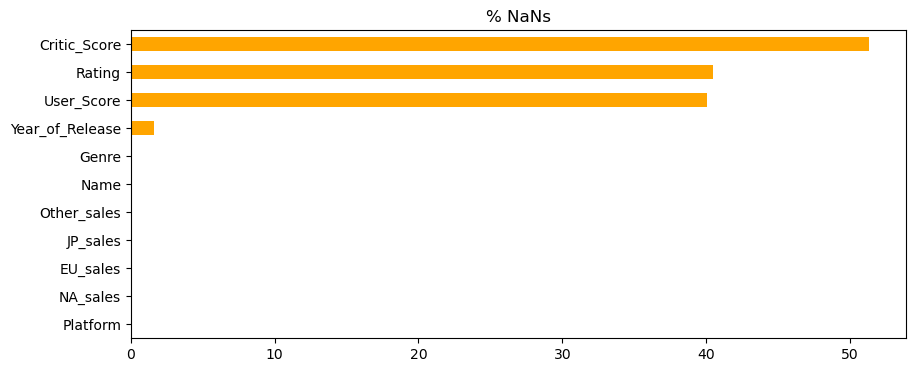

Визуальный анализ категорииалльных переменных
Слишком большое кол-во кникальных значений у категориальных переменных в столбцах:  ['Name', 'Platform', 'User_Score'] 




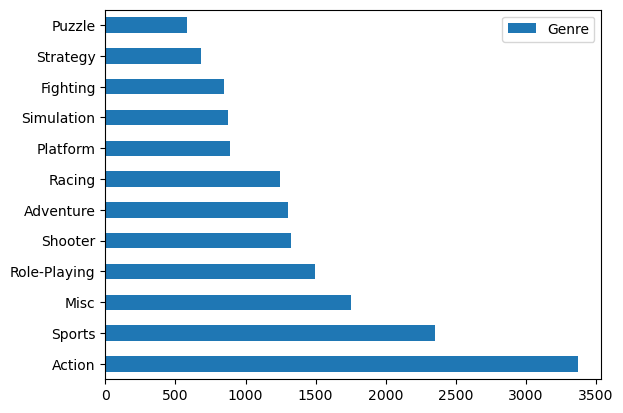

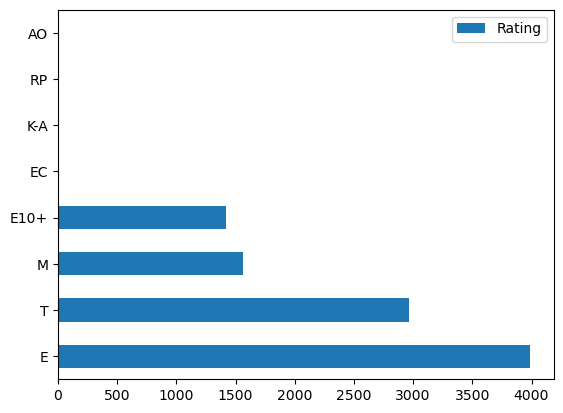

Визуальный анализ количественных переменных


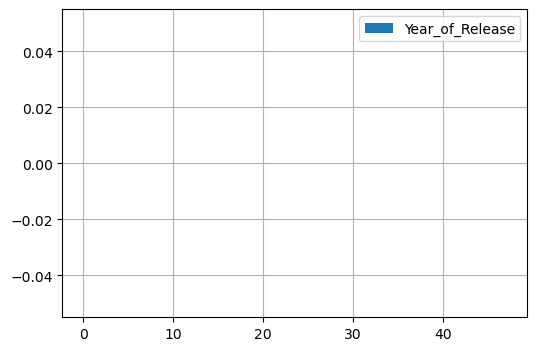

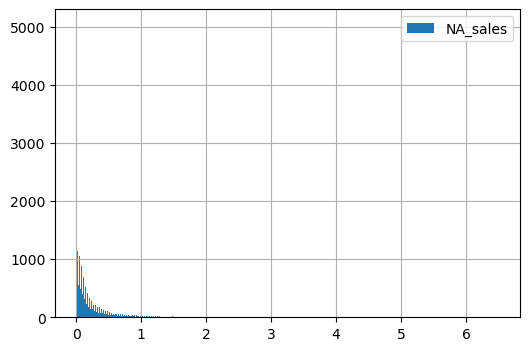

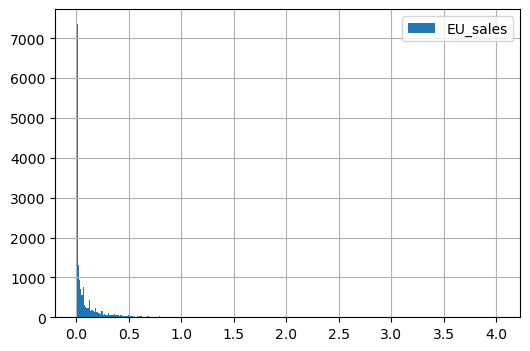

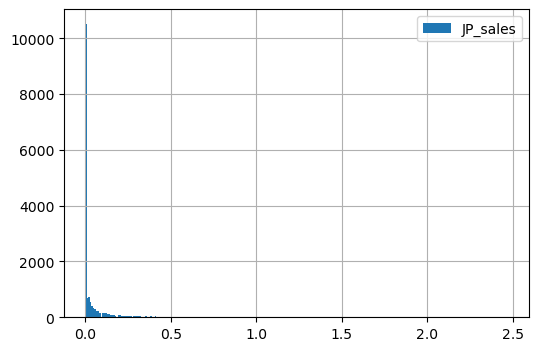

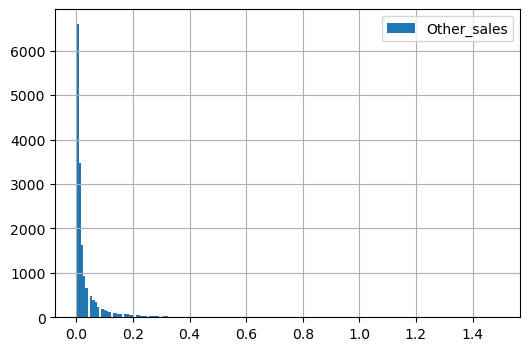

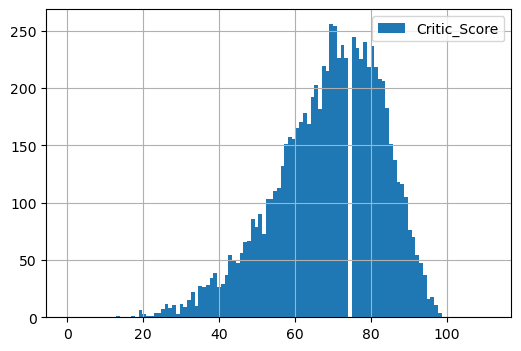

In [11]:
data_analis_visual(data, lenght=100)

## Анализ качества полученных данных.
В DataFrame:
<br>- столбцов: 11
<br>- строк: 16715
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах:
<br>Name: 0.01% или 2 шт.<br>
Year_of_Release: 1.61% или 269 шт.<br>
Genre: 0.01% или 2 шт.<br>
Critic_Score: 51.32% или 8578 шт.<br>
User_Score: 40.09% или 6701 шт.<br>
Rating: 40.48% или 6766 шт.<br>

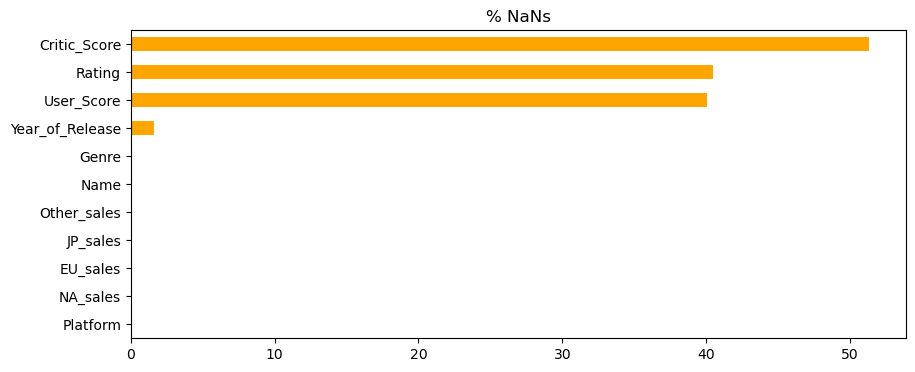

<b>Проанализируем качество данных в столбцах:<b>
- `'Name'`<br>Название столбца: не правильное.<br> Значения: категориальные.<br>Тип данных: object.<br> Значение: название игры.<br>Проблемы: 1) Название в верхнем регистре. 2) Пропусков 0.01% или 2 шт.<br>Наблюдение: много уникальных значений.<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками.
- `'Platform'`<br>Название столбца: не правильное.<br> Значения: категориальные.<br>Тип данных: object.<br> Значение: платформа.<br>Проблемы: 1) Название в верхнем регистре.<br>Наблюдение: 31 уникальное значение. <br>Рекомендации: привести название столбца к нижнему регистру.
- `'Year_of_Release'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: float64.<br> Значение: год выпуска.<br>Проблемы: 1) Название в верхнем регистре. 2) Пропуски 1.61% или 269 шт. 3) Не верный тип данных.<br>Наблюдение: 37 уникальных значений.<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками.
- `'Genre'`<br>Название столбца: не правильное.<br> Значения: категориальные.<br>Тип данных: object.<br> Значение: жанр игры.<br>Проблемы: 1) Название в верхнем регистре. 2) Пропуски 0.01% или 2 шт.<br>Наблюдение: 12 уникальных значений.<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками.
- `'NA_sales'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: float64.<br> Значение: продажи в Северной Америке (миллионы проданных копий).<br>Проблемы: 1) Название в верхнем регистре. 2) Медиана и среднее сильно отличаются, есть выбросы.<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с выбросами.
- `'EU_sales'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: float64.<br> Значение: продажи в Европе (миллионы проданных копий).<br>Проблемы: 1) Название в верхнем регистре. 2) Медиана и среднее сильно отличаются, есть выбросы.<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с выбросами.
- `'JP_sales'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: float64.<br> Значение: продажи в Японии (миллионы проданных копий).<br>Проблемы: 1) Название в верхнем регистре. 2) Медиана и среднее сильно отличаются, есть выбросы.<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с выбросами.
- `'Other_sales'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: float64.<br> Значение: продажи в других странах (миллионы проданных копий).<br>Проблемы: 1) Название в верхнем регистре. 2) Медиана и среднее сильно отличаются, есть выбросы.<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с выбросами.
- `'Critic_Score'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: float64.<br> Значение: оценка критиков (максимум 100).<br>Проблемы: 1) Название в верхнем регистре. 2) Пропуски 51.32% или 8578 шт.<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками.
- `'User_Score'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: object.<br> Значение: оценка пользователей (максимум 10).<br>Проблемы: 1) Название в верхнем регистре. 2) Пропуски 40.09% или 6701 шт.3) Не верный тип данных.<br>Наблюдение: есть какой то tbd.<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками, разобраться с tbd и типом данных.
- `'Rating'`<br>Название столбца: не правильное.<br> Значения: категориальные.<br>Тип данных: object.<br> Значение: рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>Проблемы: 1) Название в верхнем регистре. 2) Пропуски 40.48% или 6766 шт.<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, разобраться с пропусками.

## Предобработка данных.

### Приводим данные к правильному виду.

Названия всех столбцов имеют буквы в верхнем регистре, исправляем.

In [12]:
data.columns = data.columns.str.lower()

### Работаем с пропусками.

<b>`'name'` `'year_of_release'` `'genre'` `'critic_score'` `'user_score'` `'rating'`

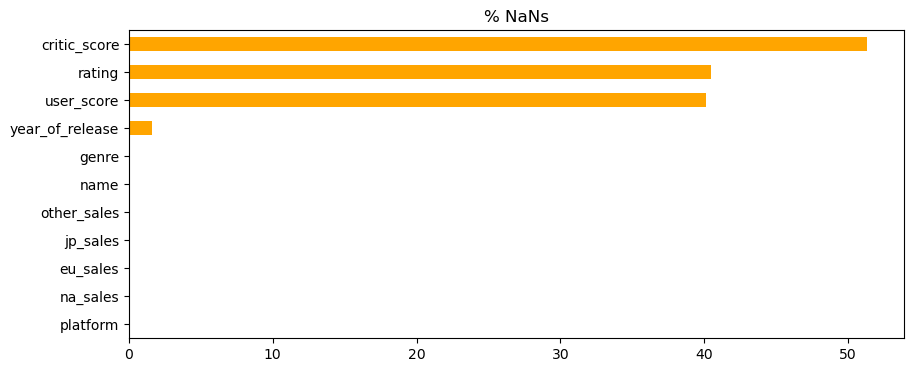

In [13]:
show_nan(data)

<b>`'name'`

Доля не существенна, дропаем, то что не особо продавалось, учитываем при анализе, что могут быть пропуски.

In [14]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data = data.dropna(subset=['name']) # КОД РЕВЬЮЕРА
print('Пропусков в толбце name:', data['name'].isna().sum())

Пропусков в толбце name: 0


Пропуски в данном столбце могли возникнуть из-за некорректного сбора данных или сложности в переводе на латиницу.

<b>`'year_of_release'`

In [16]:
data[(data['year_of_release'].isna())].describe()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


Пропусков в year_of_release: 1.61% или 269 шт., т.е. не много, можно было бы и дропнуть, но среди игр с пропусками есть игры с большими продажами, если будем проводить анализ по году, то просто будем рассматривать данные без пропусков. Возможно, пропуски связаны либо с технической ошибкой, либо из-за того, что в разных странах игры выпускались в разные годы или в принципе, данная информация не была корректно занесена. Заменим на 9999

In [17]:
data.loc[data['year_of_release'].isna(), 'year_of_release'] = 9999

<b>`'genre'`

In [18]:
display(data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Не трогаем, хорошие продажи.

<b>`'user_score'` tbd

tbd означает что отценка еще не поставлена дословно To Be Determined, то есть "Будет определено". Заменим все значения tbd на NaN.

In [19]:
print(len(data[data['user_score'] == 'tbd']))
print(len(data[data['user_score'].isna()]))

2424
6699


In [20]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [21]:
print(len(data[data['user_score'] == 'tbd']))
print(len(data[data['user_score'].isna()]))

0
9123


<b>`'critic_score'`

In [22]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
data['user_score'].astype('float')
data[~data['critic_score'].isna()].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.012504,-0.016650,-0.024069,-0.014254,-0.013742
na_sales,-0.012504,1.000000,0.840590,0.468787,0.728123,0.240755
eu_sales,-0.016650,0.840590,1.000000,0.520103,0.718046,0.220752
jp_sales,-0.024069,0.468787,0.520103,1.000000,0.396889,0.152593
other_sales,-0.014254,0.728123,0.718046,0.396889,1.000000,0.198554
critic_score,-0.013742,0.240755,0.220752,0.152593,0.198554,1.000000


In [24]:
print(data['critic_score'].isna().sum())
print(data['user_score'].isna().sum())
print(data['rating'].isna().sum())
print('Совпадение в пропусках:', data[(data['critic_score'].isna()) & (data['user_score'].isna()) & (data['rating'].isna())]\
      .shape[0])

8576
9123
6764
Совпадение в пропусках: 6665


Заменим пропуски в столбцах на заглушки.

In [25]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

In [26]:
print(data['rating'].isna().sum())

0


Пропуски могли быть допущены из-за множества причин, из-за технической, из-за того что данные сливались DataSet из разных мест и отличались, банально из-за того что не было оценки. Пропуски в стобце `'rating'` связаны с принципами работы организации Entertainment Software Rating Board (ESRB), данная некоммерческая организация готовит рейтинги для рынка США и Канады, соответственно, если игра не предназначена для этих рынков, то и рейтинга не будет. В столбце `'rating'` заполним пропуски заглушкой 'unknown'.

### Меняем тип данных.

In [27]:
data.loc[:, 'user_score'] = data.loc[:, 'user_score'].astype('float')
data.loc[:, 'year_of_release'] = data.loc[:,'year_of_release'].astype('int')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB
None


Данные в 'user_score' имели не верный тип т.к. там были значения tbd, избавились от них выше. В 'year_of_release' были дробные значения, питон своеобразно с ними работает, поэтому лучше изменить на int.

### Создаем вспомогательные столбцы.

In [28]:
data.loc[:,'total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных.

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [29]:
display(data['year_of_release'].sort_values().unique())

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 9999])

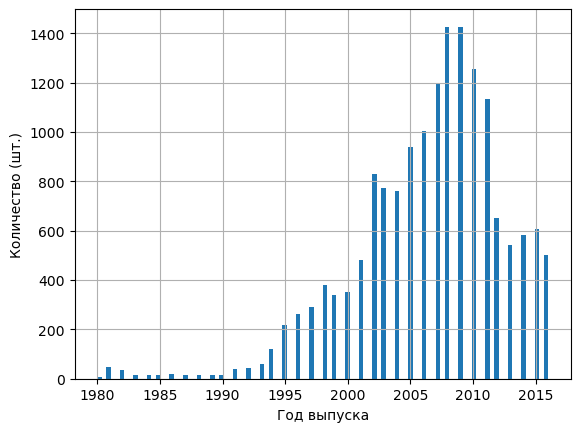

In [30]:
plt.xlabel('Год выпуска')
plt.ylabel('Количество (шт.)')
data[data['year_of_release'] < 3000]['year_of_release'].hist(bins=100);

<b>Вывод:</b> С 80 годов по 95-ые игры выпускались редко (можно пренебречь), далее с каждым годом кол-во производимых игр увеличивалось, бум пришелся на 2002 - 2011 года, 2012-2016 примерно стабильный выпуск, вероятно игры становились более сложными в производстве (графика, сложность и т.д.) и это требовало большего времени.

###  Посмотрим, как менялись продажи по платформам. 

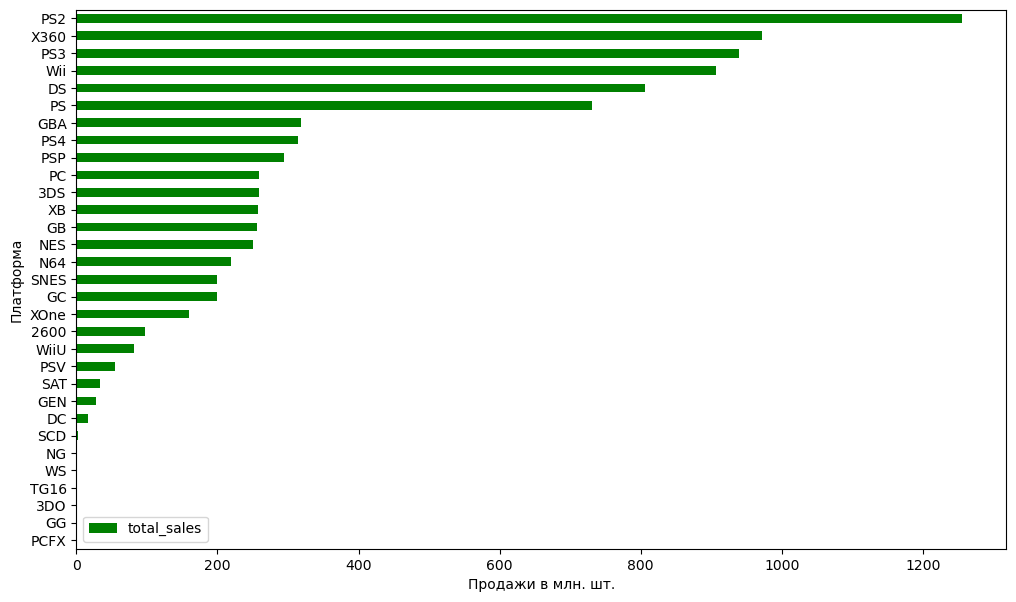

In [31]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales')\
.plot(kind='barh', color='green', figsize=(12,7));
plt.ylabel('Платформа');
plt.xlabel('Продажи в млн. шт.');

Выберем ТОП платформ и посмотрим на их время жизни.

In [32]:
top_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).reset_index()['platform'].head(6)

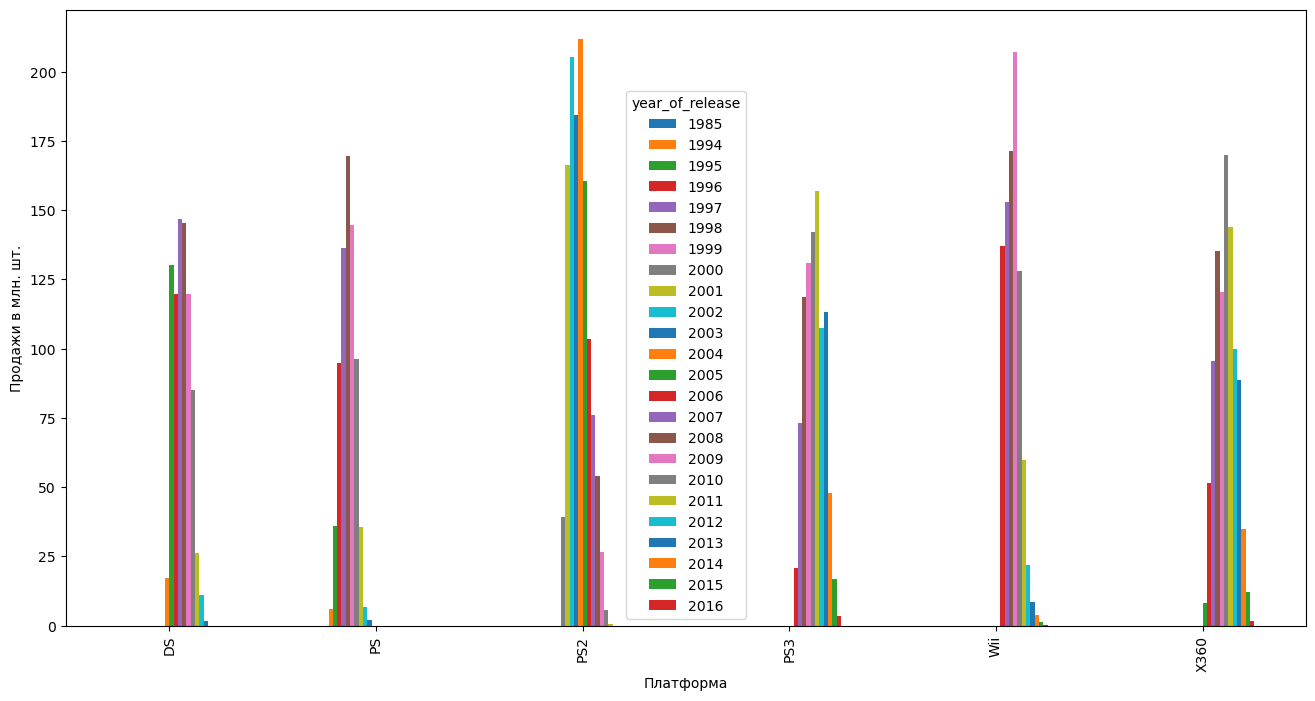

In [33]:
data[(data['year_of_release'] < 3000) & (data['platform'].isin(top_platform))]\
.pivot_table(index ='platform', columns='year_of_release', values='total_sales',aggfunc='sum')\
.plot(figsize=(16,8), kind='bar');
plt.xlabel('Платформа');
plt.ylabel('Продажи в млн. шт.');

Посмотрим как часто появляются платформы из ТОП-а по годам.

In [34]:
top_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).reset_index()['platform'].head(10)

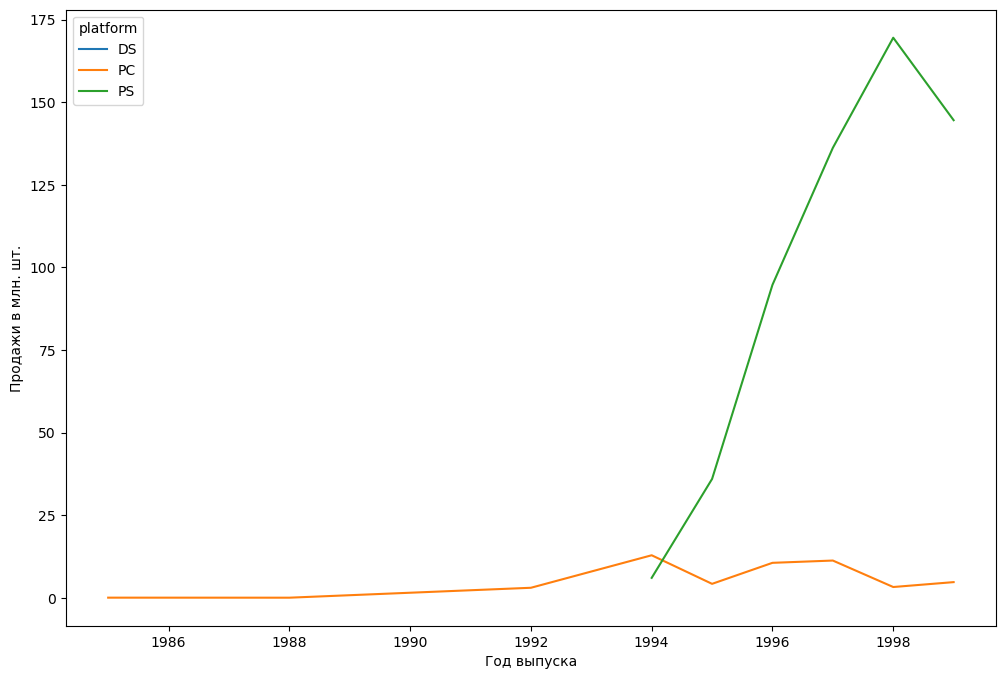

In [35]:
data[(data['year_of_release'] < 2000) & (data['platform'].isin(top_platform)) & (data['year_of_release'] > 1900)]\
.pivot_table(index ='year_of_release', columns='platform', values='total_sales',aggfunc='sum')\
.plot(figsize=(12,8));
plt.xlabel('Год выпуска');
plt.ylabel('Продажи в млн. шт.');

In [36]:
top_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index()['platform'].head(12)

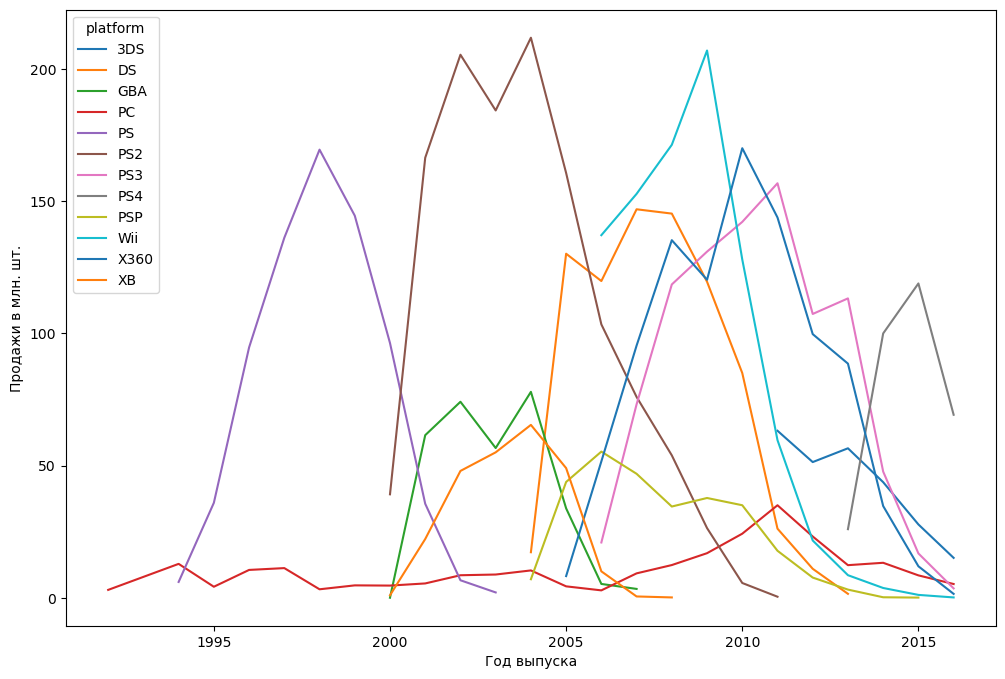

In [37]:
data[(data['year_of_release'] < 3000) & (data['platform'].isin(top_platform)) & (data['year_of_release'] > 1990)].\
pivot_table(index ='year_of_release', columns='platform', values='total_sales',aggfunc='sum').plot(figsize=(12,8));
plt.xlabel('Год выпуска');
plt.ylabel('Продажи в млн. шт.');

Посмотрим какие платформы появляются с 2010-ого года и как обстоят дела с продажами.

In [38]:
top_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index()['platform']

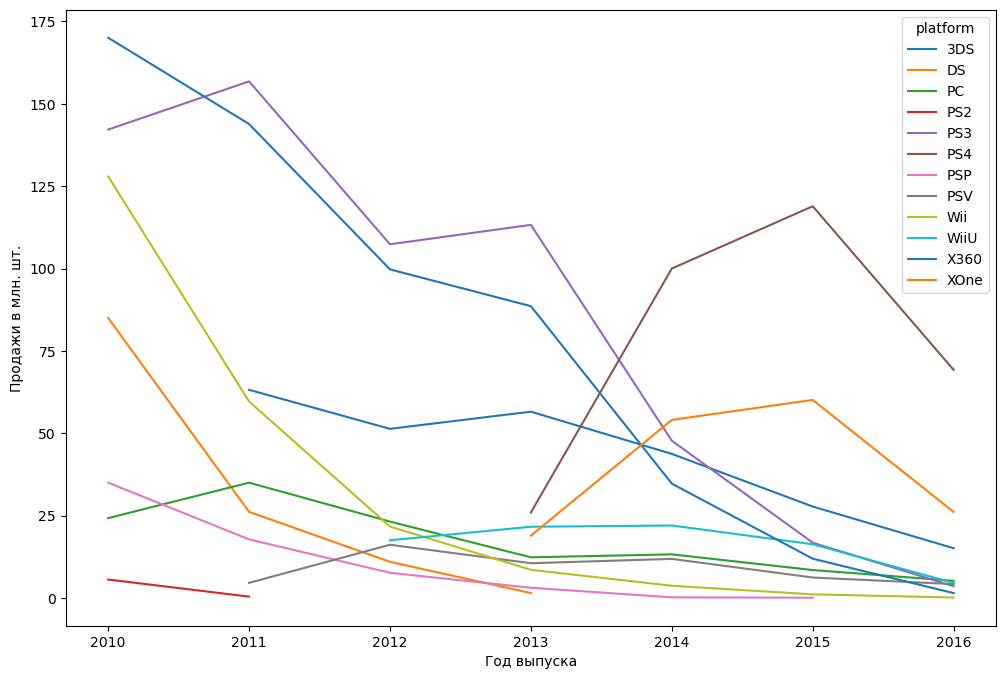

In [39]:
data[(data['year_of_release'] < 3000) & (data['platform'].isin(top_platform)) & (data['year_of_release'] > 2009)]\
.pivot_table(index ='year_of_release', columns='platform', values='total_sales',aggfunc='sum').plot(figsize=(12,8));
plt.xlabel('Год выпуска');
plt.ylabel('Продажи в млн. шт.');

<b>Вывод:</b>Самые большие продажи по не самым новым платформам, что понятно, сказывается накопительный эффект. Время жизни платформы 8-10 лет, до 90-ых годов популярных платформ было мало и появлялись они редко с 2000-ых и особенно в 2004-2006 годах появилось множество популярных платформ, выходили каждый год и по нескольку в год, после 2006 новая популярная платформа вышла только в 2013 году, что обусловлено сроком жизни платформ и техническим прогрессом. Видно, что время жизни популярных платформ по объемам продаж заканчивается, начинается время роста новых платформ. В 2011 г. появились 2 многообещающие, новые платформы - XOne и PS4 (т.к. данные за 2016 год не полные).

### Рассмотриваем детально промежуток времени с 2014 года

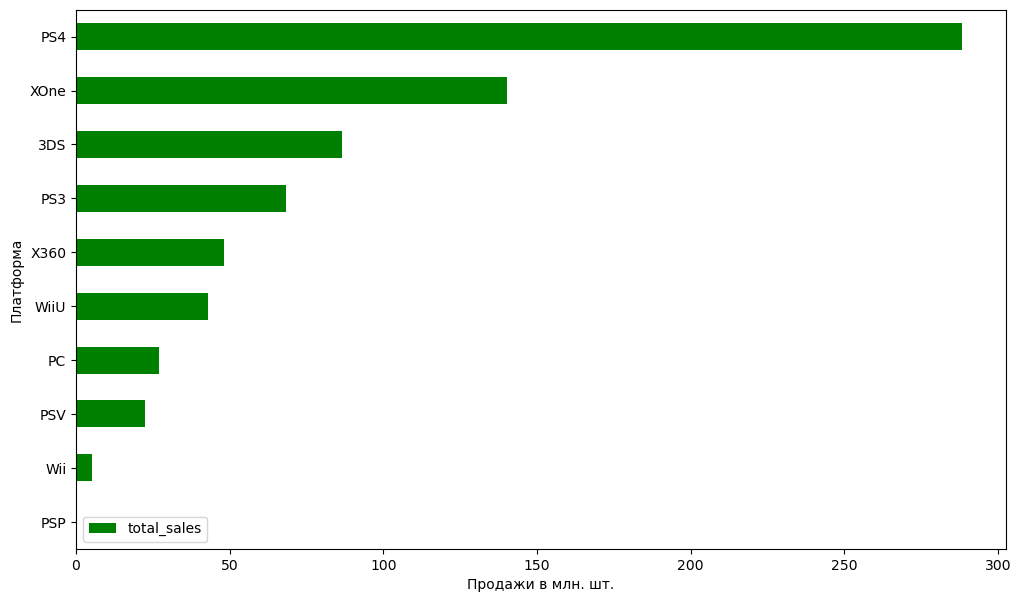

In [40]:
data[(data['year_of_release'] < 3000) & (data['year_of_release'] > 2013)]\
.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales').plot(kind='barh', color='green', figsize=(12,7));
plt.ylabel('Платформа');
plt.xlabel('Продажи в млн. шт.');

Рассмотрим динамику по ТОП-10 платформам, определим, продажи по каким растут по каким падают.

In [41]:
top_platform = data[data['year_of_release'] > 2013].pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index()['platform'].head(10)

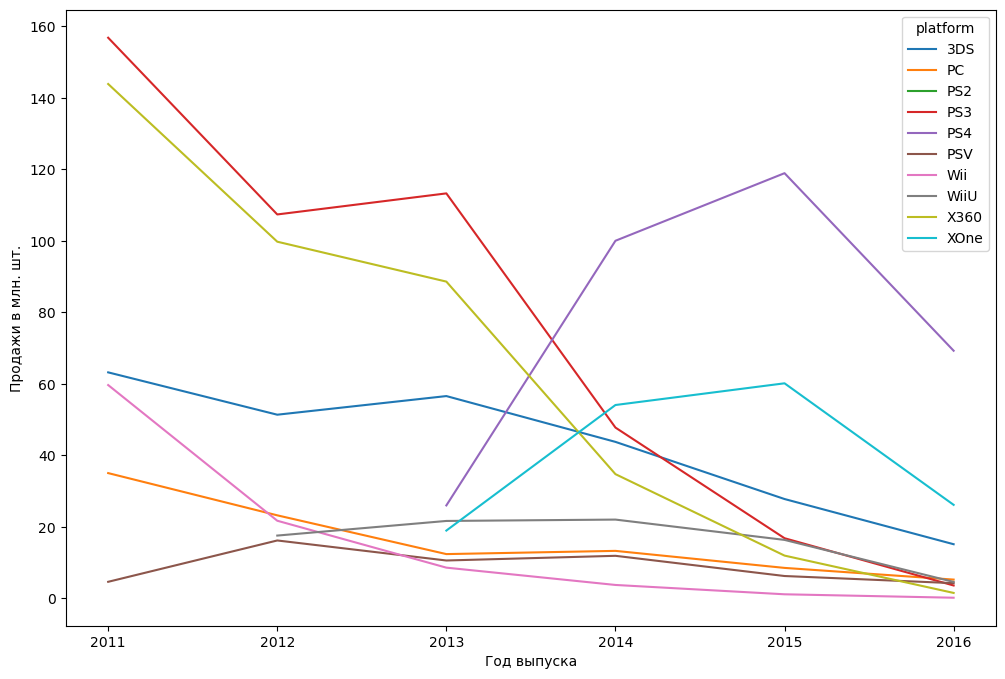

In [42]:
data[(data['year_of_release'] < 3000) & (data['platform'].isin(top_platform)) & (data['year_of_release'] > 2010)]\
.pivot_table(index ='year_of_release', columns='platform', values='total_sales',aggfunc='sum').plot(figsize=(12,8));
plt.xlabel('Год выпуска');
plt.ylabel('Продажи в млн. шт.');

<b> Вывод:</b> Мы видим, что новых платформ не так много, старые же заканчивают свой жизненный цикл и по ним падают продажи. Из перспективных платформ можно выделить XOne и PS4, стоит приглядеться и к платформам PSV (2011 г.), WiiU (2012 г.) и 3DS (2011 г.), но скорее всего их придется исключить из списка, т.к. появились они давно, жизненный цикл заканчивается (есть тенденция к снижению продаж).

### Построим для перспективных платформ график «ящик с усами»

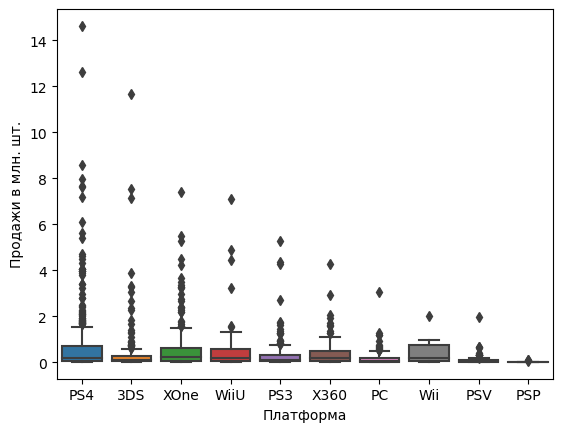

In [43]:
sea.boxplot(data=data[(data['year_of_release'] < 3000) & (data['year_of_release'] > 2013)], x='platform', y='total_sales');
plt.xlabel('Платформа');
plt.ylabel('Продажи в млн. шт.');

Для оценки самих ящиков, обрежем выбросы.

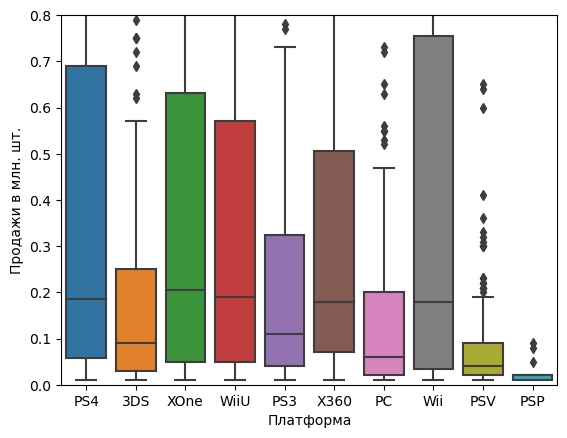

In [44]:
sea.boxplot(data=data[(data['year_of_release'] < 3000) & (data['year_of_release'] > 2013)], x='platform', y='total_sales');
plt.ylim([0,0.8])
plt.xlabel('Платформа');
plt.ylabel('Продажи в млн. шт.');

<b>Вывод:</b> По графикам можно сделать вывод, что больше всего бестселлеров на платформах PS4, 3DS, XOne, WiU. Рассматривая же сам размер ящиков расстояние между квантиялями .25 - .75 и медиану 0.5 квантиль можно сказать, что предпочтительными являются PS4, XOne, WiiU и Wii. Т.к. Wii это приставка 2006 г. и эта платформа не может похвастаться наличием большого кол-ва бестселлеров, мы не будем рассматривать ее как перспективную. 3DS, при наличии большого кол-ва бестселлеров, в основной массе продуктов до .75 квантиля, показывает достаточно скромные результаты, соответственно ее мы тоже рассматривать не будем. Таким образом у нас остаются PS4, XOne, WiiU.

### На примере платформы PS4, посмотрим как влияют отзывы пользователей и критиков на продажи.

In [45]:
data_ps4 = data[(data['year_of_release'] < 3000) & (data['year_of_release'] > 2013) & (data['platform'] == 'PS4')]

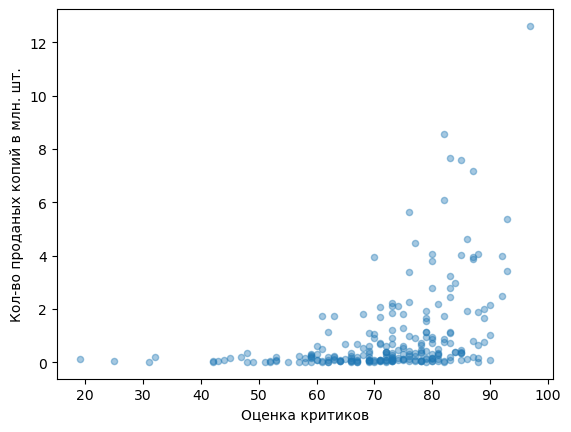

In [46]:
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4);
plt.ylabel('Кол-во проданых копий в млн. шт.');
plt.xlabel('Оценка критиков');

In [47]:
data_ps4['critic_score'].corr(data_ps4['total_sales'])

0.4026614106810409

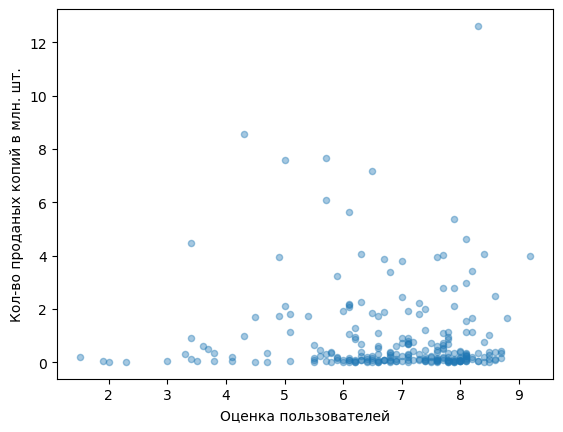

In [48]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4);
plt.ylabel('Кол-во проданых копий в млн. шт.');
plt.xlabel('Оценка пользователей');

In [49]:
data_ps4['user_score'].corr(data_ps4['total_sales'])

-0.04013158947269733

<b>Вывод:</b>По диаграмам рассеияния видно, что чем меньше оценка тем меньше шанс у игры продаваться вообще и выйти в топ по продажам, особенно это четко заметно у критиков, видна зависимость объема продаж от оценки, пользователи же оценивают не проффесионально, субьективно из-за чего особой, прямой корреляции с продажами нет.

<b> Проверим так ли это для других 2-ух платформ.

In [50]:
data_xone = data[(data['year_of_release'] < 3000) & (data['year_of_release'] > 2013) & (data['platform'] == 'XOne')]

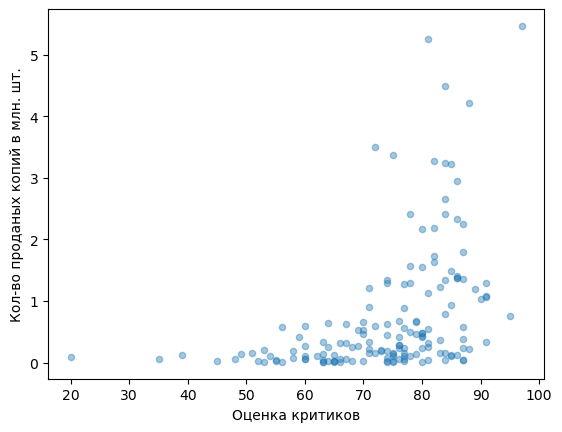

In [51]:
data_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4);
plt.ylabel('Кол-во проданых копий в млн. шт.');
plt.xlabel('Оценка критиков');

In [52]:
data_xone['critic_score'].corr(data_xone['total_sales'])

0.42867694370333226

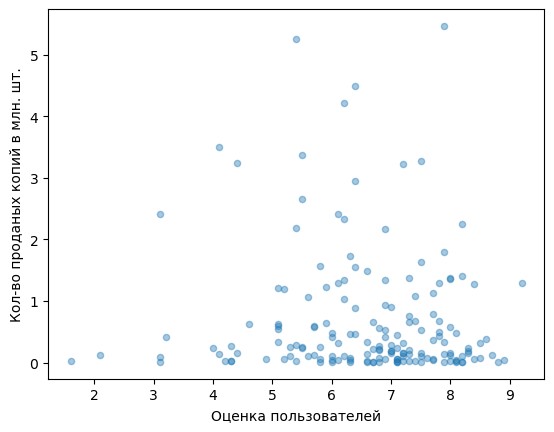

In [53]:
data_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4);
plt.ylabel('Кол-во проданых копий в млн. шт.');
plt.xlabel('Оценка пользователей');

In [54]:
data_xone['user_score'].corr(data_xone['total_sales'])

-0.0703839280647581

In [55]:
data_wiiu = data[(data['year_of_release'] < 3000) & (data['year_of_release'] > 2013) & (data['platform'] == 'WiiU')]

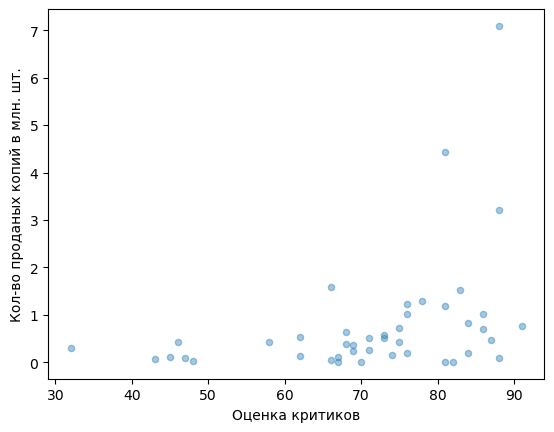

In [56]:
data_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4);
plt.ylabel('Кол-во проданых копий в млн. шт.');
plt.xlabel('Оценка критиков');

In [57]:
data_wiiu['critic_score'].corr(data_wiiu['total_sales'])

0.370201412480884

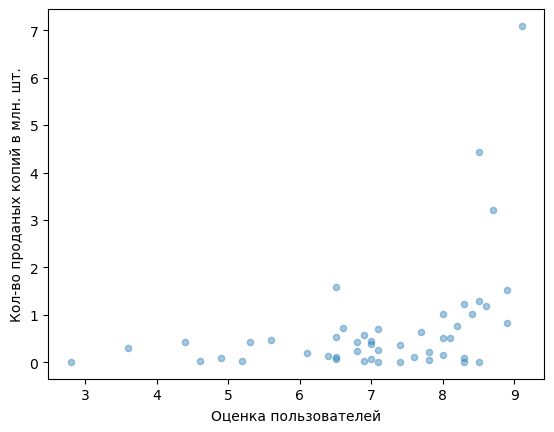

In [58]:
data_wiiu.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4);
plt.ylabel('Кол-во проданых копий в млн. шт.');
plt.xlabel('Оценка пользователей');

In [59]:
data_wiiu['user_score'].corr(data_wiiu['total_sales'])

0.40792645792170773

<b>Вывод:</b>Как видим для платформы XOne ситуация такая же как для PS4, а вот у платформы WiiU корреляция оценки пользователей с продажами даже выше чем у оценки критиков, вероятно, это связано с тем, что у WiiU существенно меньше бестселлеров и пользователям проще дать более точную оценку.

### Рассмотрим зависимость объема продаж от жанра.

In [60]:
data_sort_wy = data[(data['year_of_release'] > 2013) & \
                      ((data['platform'] == 'XOne') | (data['platform'] == 'PS4') | (data['platform'] == 'PSV') |\
                       (data['platform'] == 'WiiU'))]

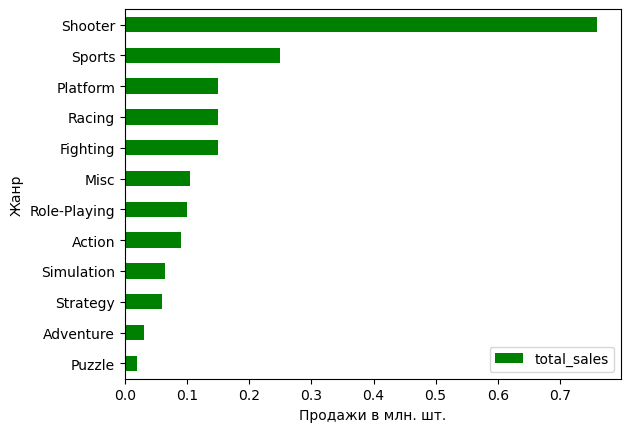

In [61]:
data_sort_wy.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales',\
    ascending=True).plot(kind='barh', color='green');
plt.ylabel('Жанр');
plt.xlabel('Продажи в млн. шт.');

Кол-во игр в каждом жанре.

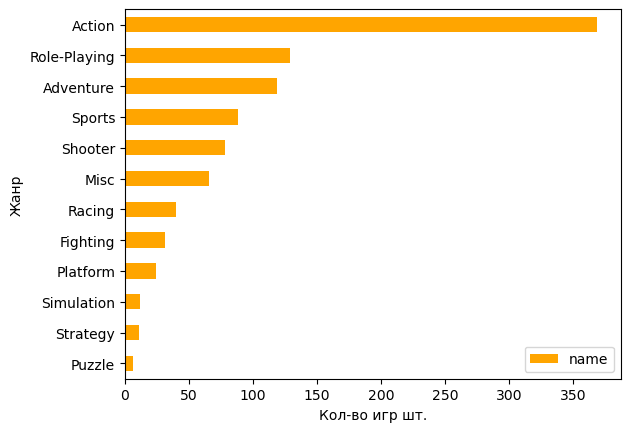

In [62]:
data_sort_wy.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name',\
    ascending=True).plot(kind='barh', color='orange');
plt.ylabel('Жанр');
plt.xlabel('Кол-во игр шт.');

<b>Вывод:</b> По медианному значению продаж лидирует, с существенным отрывом, жанр Shooter, хотя больше всего игр в жанре Action, который находится в конце рейтинга по медианным продажам, далее идут игры жанра Sports, Platform, Racing и Fighting, далее идут все остальные. Меньше всего медиана по продажам у игр жанра Strategy, Adventure, Puzzle. Соотнеся кол-во игр каждого жанра с медианным значением их продаж, можно сказать, что самый эффективный жанр с точки зрения продаж это Shooter.

### Составим портрет пользователя каждого региона

<b> NA

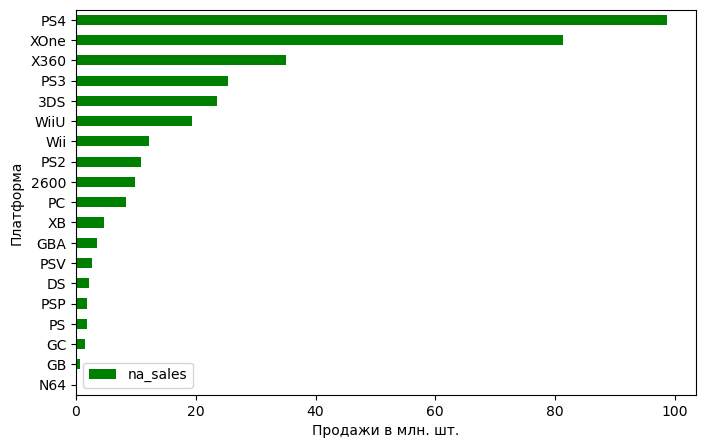

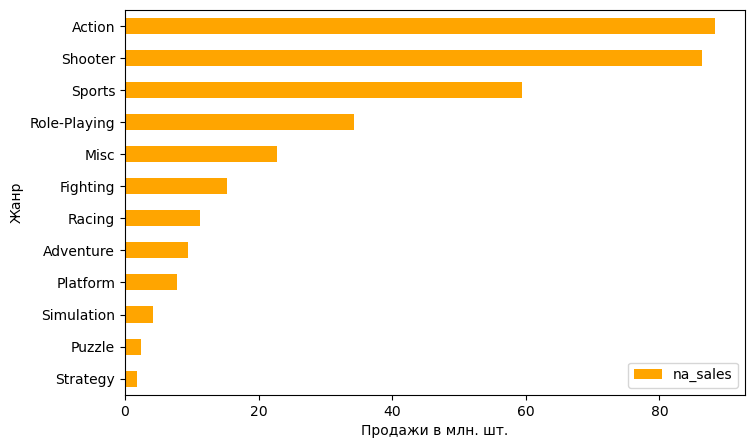

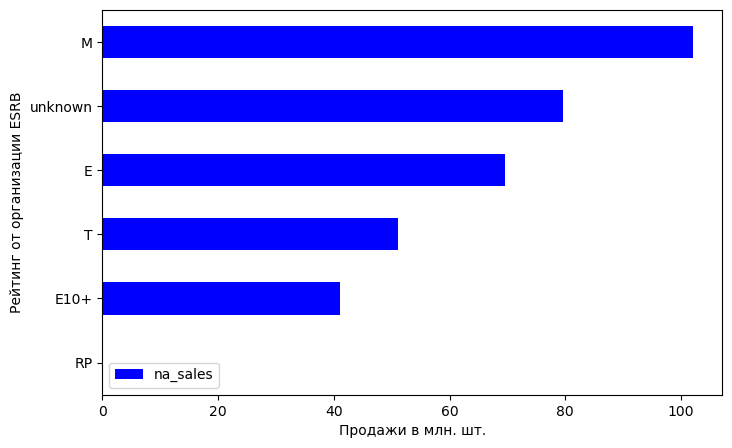

In [63]:
data[data['year_of_release'] > 2013].pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=True)\
.plot(kind='barh', color='green', figsize=(8,5));
plt.ylabel('Платформа');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=True)\
.plot(kind='barh', color='orange', figsize=(8,5));
plt.ylabel('Жанр');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='rating', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=True)\
.plot(kind='barh', color='blue', figsize=(8,5));
plt.ylabel('Рейтинг от организации ESRB');
plt.xlabel('Продажи в млн. шт.');

<b>EU 

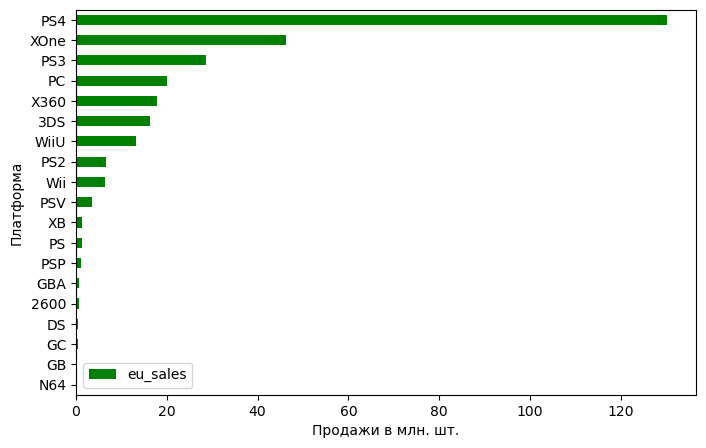

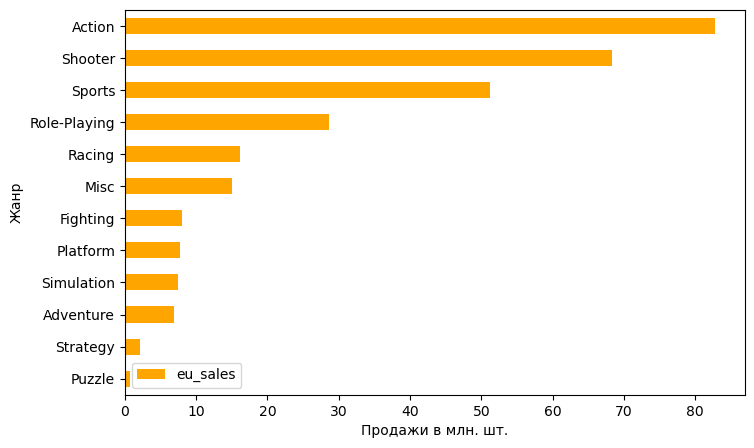

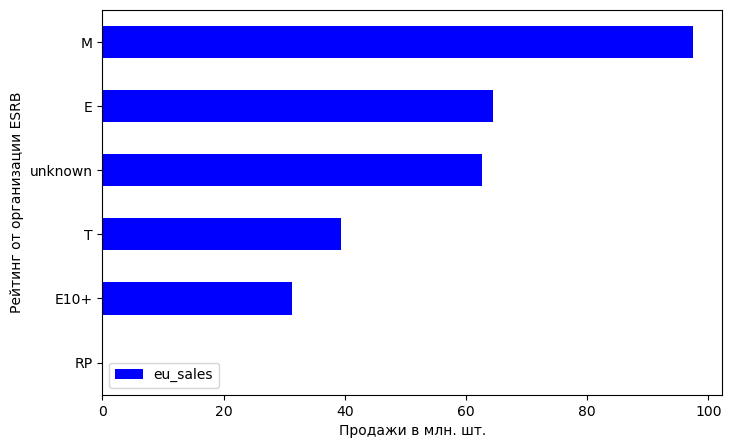

In [64]:
data[data['year_of_release'] > 2013].pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=True)\
.plot(kind='barh', color='green', figsize=(8,5));
plt.ylabel('Платформа');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=True)\
.plot(kind='barh', color='orange', figsize=(8,5));
plt.ylabel('Жанр');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=True)\
.plot(kind='barh', color='blue', figsize=(8,5));
plt.ylabel('Рейтинг от организации ESRB');
plt.xlabel('Продажи в млн. шт.');

<b>JP

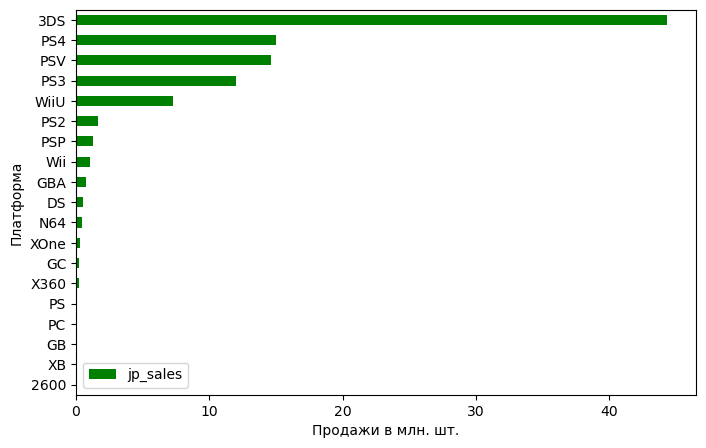

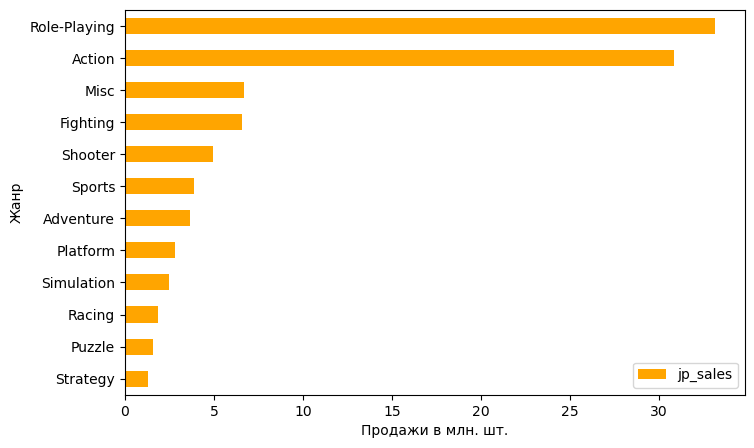

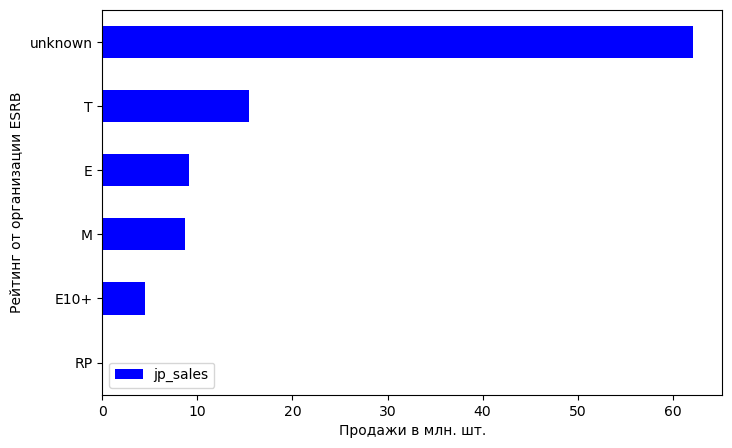

In [65]:
data[data['year_of_release'] > 2013].pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=True)\
.plot(kind='barh', color='green', figsize=(8,5));
plt.ylabel('Платформа');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=True)\
.plot(kind='barh', color='orange', figsize=(8,5));
plt.ylabel('Жанр');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=True)\
.plot(kind='barh', color='blue', figsize=(8,5));
plt.ylabel('Рейтинг от организации ESRB');
plt.xlabel('Продажи в млн. шт.');

<b>Other

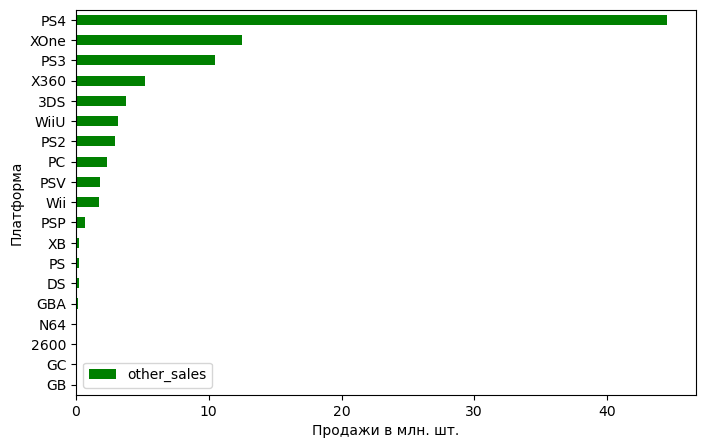

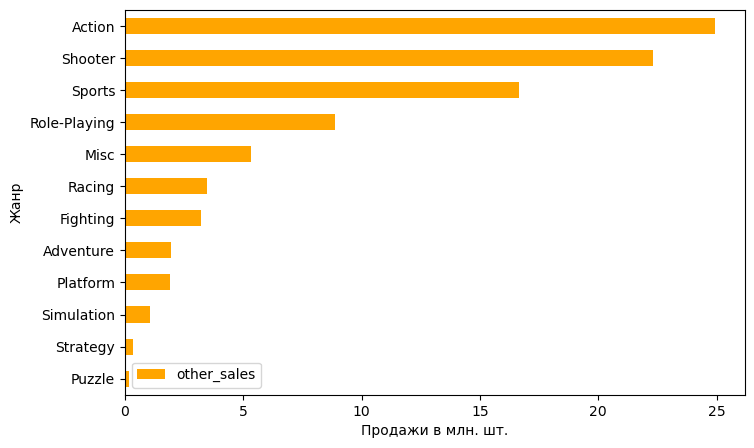

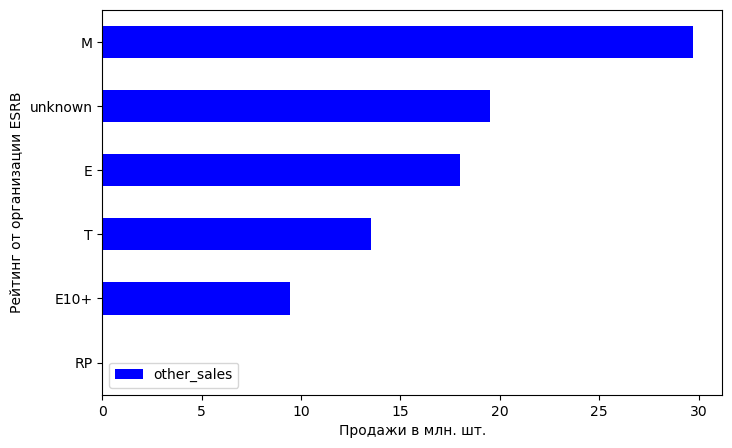

In [66]:
data[data['year_of_release'] > 2013].pivot_table(index='platform', values='other_sales', aggfunc='sum')\
.sort_values(by='other_sales', ascending=True)\
.plot(kind='barh', color='green', figsize=(8,5));
plt.ylabel('Платформа');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='genre', values='other_sales', aggfunc='sum')\
.sort_values(by='other_sales', ascending=True)\
.plot(kind='barh', color='orange', figsize=(8,5));
plt.ylabel('Жанр');
plt.xlabel('Продажи в млн. шт.');
data[data['year_of_release'] > 2013].pivot_table(index='rating', values='other_sales', aggfunc='sum')\
.sort_values(by='other_sales', ascending=True)\
.plot(kind='barh', color='blue', figsize=(8,5));
plt.ylabel('Рейтинг от организации ESRB');
plt.xlabel('Продажи в млн. шт.');

<b>Вывод:</b> Как мы видим в EU и NA популярны одни и те же платформы PS4,XOne,X360,PS3, 3DS, WiiU (в порядке убывания кол-ва продаж), при этом в NA разница в продажах между PS4 и XOne не велика, в EU же наблюдаем существенный отрыв в продажах у PS4, также в EU и NA популярны одни и те же жанры (в топе Action, Sports, Shooter). В JP потребление выглядит несколько иначе, на первом месте, с существенным отрывом по продажам, платформа 3DS, платформы PS4,PSV,PS3 имеют схожий объем продаж, XOne в самом низу рейтинга, самый популярный жанр JP это Role-Playing и Actionn. Во всех случаях прослеживается зависимость продаж от рейтинга ESRB, но в JP у большей части продающихся игр нет рейтинга ESRB, как мы заметили ранее, это связано с особенностями работы этой некоммерческой организации (рынок Америки и Канады). В NA и EU зависимость объема продаж от возрастного рейтинга игр (в порядке убывания кол-ва проданных копий): «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам», «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше», в JP же Т и Е меняются местами, но это может быть вызвано отсутствием возрастного рейтинга у большинства игр.

`Справка`<br>
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.<br>
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults").<br>
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.<br>
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.<br>
«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:


### Проверим гипотезы.

<b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [67]:
alpha = 0.05

In [68]:
results = st.ttest_ind(data[(data['platform'] == 'PC') & (~data['user_score'].isna()) & (data['year_of_release'] > 2013)]['user_score'],\
                       data[(data['platform'] == 'XB') & (~data['user_score'].isna()) & (data['year_of_release'] > 2013)]['user_score'])

In [69]:
print('p-value=', results.pvalue)
if results.pvalue  < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value= 0.676234113777152
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b>Совокупности разные, в них есть пропуски, т.е. совокупности не генеральные, а просто выборки, чтобы дать оценку вероятности нашей гипотезы необходимо использовать метод scipy.stats.ttest_ind. Результат - гипотезу не отвергаем!

<b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.

In [70]:
results = st.ttest_ind(data[(data['genre'] == 'Action') & (~data['user_score'].isna()) & (data['year_of_release'] > 2013)]['user_score'],\
                       data[(data['genre'] == 'Sports') & (~data['user_score'].isna()) & (data['year_of_release'] > 2013)]['user_score'])

In [71]:
print('p-value=', results.pvalue)
if results.pvalue  < alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-value= 3.318410202419957e-14
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b> Для того, чтобы подтвердить гипотезу о не равенстве, p_value должен быть меньше критического уровня статистической значимости. Для проверки также используем метод scipy.stats.ttest_ind, т.к. две разные выборки. Результат - не получилось отвергнуть нулевую гипотезу!

## Общий вывод

Данные есть начиная 1980 г. по 2016 г., но за 2016 г. данные не полные.

С 80 годов по 95-ые игры выпускались редко, далее с каждым годом кол-во производимых игр увеличивалось, бум пришелся на 2002 - 2011 года, в 2012-2016 кол-во выпускаемых игр уменьшилось и было стабильно, игры становились более сложными в производстве.

Время жизни платформы 8-10 лет, до 90-ых годов популярных платформ было мало и появлялись они редко, с 2000-ых и особенно в 2004-2006 годах появилось множество популярных платформ, выходили каждый год и по нескольку в год, после 2006 новая популярная платформа вышла только в 2011 году, что обусловлено сроком жизни платформ и техническим прогрессом. 

Так как новых платформ не так много, а старые уже завершают свой жизненный цикл (по ним падают продажи), для целей проекта мы сравнили наиболее перспективные платформы - XOne (2013 г.), PS4 (2013 г.) и несколько более старых PSV (2011 г.), WiiU (2012 г.), 3DS (2011 г.).

Так как игровой рынок достаточно быстро меняется, особенно в последние годы из-за технического прогресса, для поиска перспективной платформы и жанра мы взяли выборку начиная с 2014 г.

<b>В результате нашего исследования мы сделали следующие выводы:

<b> На продаваемость игр влияет: 
- `Актуальность платформы`, стоит рассматривать новые платформы, в начале жизненного цикла, которые сейчас популярны, для которых выпускаются игры, стоит отдать предпочтение PS4 и XOne. PSV (2011 г.), WiiU (2012 г.), 3DS (2011 г.) находятся на излете, завершают свой жизненный цикл, продажи падают (в Японии 3DS на первом месте по объему проданных копий игр, но рынок Японии не велик);
- `Рейтинг критиков`, для всех платформ видна схожая зависимость высокого рейтинга и больших объемов продаж;
- `Рейтинг пользователей`, явная, линейная зависимость есть только для платформы WiiU, т.к. на ней встречается мало бестселлеров, игры средние, пользователи чаще дают объективные оценки;
- `Рейтинг ESRB`, актуален для Северной Америки и Европы, обозначает возрастную категорию для игр, больший объем проданных копий у игр относящихся к категории «M» («Mature») — «Для взрослых», далее «E» («Everyone») — «Для всех», далее «T» («Teen») — «Подросткам», самый маленький объем продаж у категории «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- `Жанр игры`, стоит делать ставку на продукты из ТОП жанров по медианным объемам продаж, в первую очередь на Shooter-ы, во вторую-третью на Sports, Platform, Racing и Fighting;
- `Год выпуска игры`, игры которые недавно вышли имеют больший потенциал роста продаж.

<b>Перспективность платформы (по убыванию):
* PS4, много бестселлеров, игры в целом хорошо продаются, платформа является самой популярной в Северной Америке и сверхпопулярной в Европе;
* XOne, много бестселлеров, игры в целом хорошо продаются, платформа почти также популярна как PS4 в Северной Америке, не очень популярна в Европе;
* WiiU, не много бестселлеров, но игры в целом хорошо продаются, видна отрицательная динамика продаж в последние годы, вероятно платформа уже устаревает, лучше ее не рассматривать.
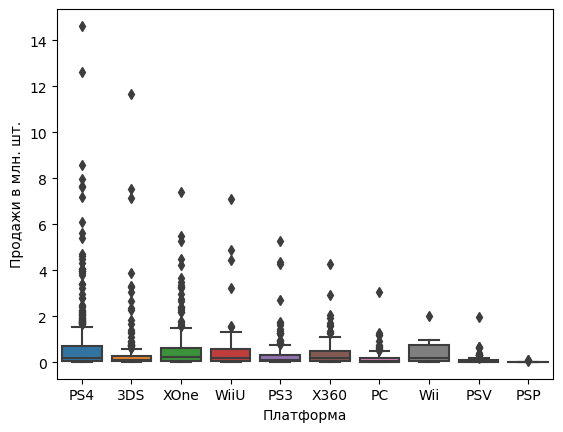
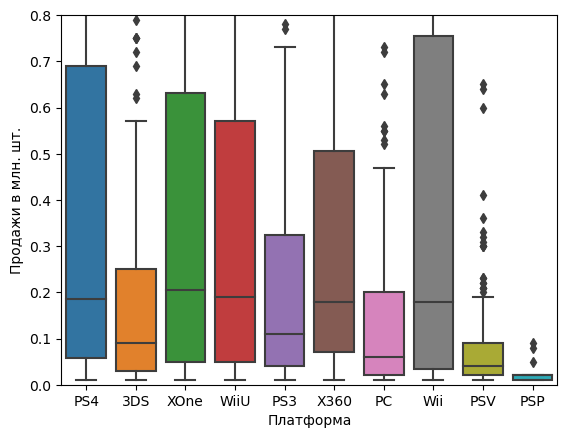    
<b>Перспективность жанра (по убыванию):
* Shooter, самое высокое медианное количество проданных копии, при среднем кол-ве игр, существенный отрыв от остальных жанров по этому показателю;
* Sports, Platform, Racing и Fighting, существенно меньшие медианное кол-во копий.
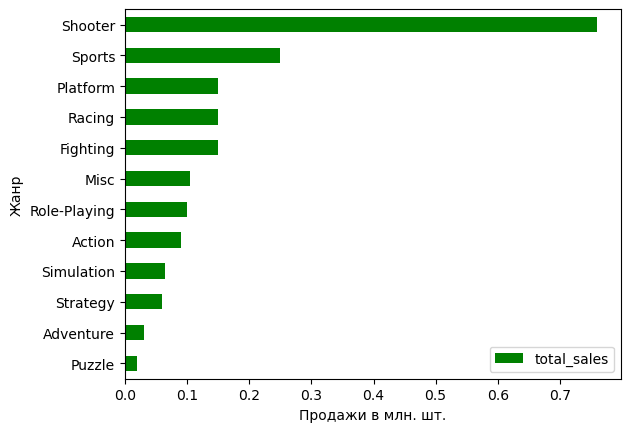
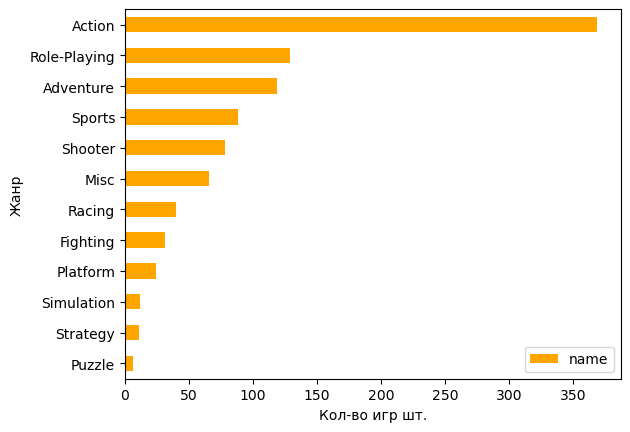
    
<b> Рекомендации бизнесу:
- Сосредоточится на играх платформы PS4 и XOne;
- Выбирать игры жанра Shooter;
- Выбирать игры с оценкой критиков от 60 и выше;
- Выбирать игры с рейтингом ESRB M и E;
- Выбирать новые игры, вышедшие не более чем год назад.